In [3]:
import brian2 as b2
from neurodynex.tools import input_factory, plot_tools
import random
import matplotlib.pyplot as plt

# Neuron model default values
V_REST = -70 * b2.mV
V_RESET = -65 * b2.mV
FIRING_THRESHOLD = -50 * b2.mV
MEMBRANE_RESISTANCE = 10. * b2.Mohm
MEMBRANE_TIME_SCALE = 8. * b2.ms
ABSOLUTE_REFRACTORY_PERIOD = 2.0 * b2.ms


def simulate_LIF_neuron(input_current,
                        simulation_time=5 * b2.ms,
                        v_rest=V_REST,
                        v_reset=V_RESET,
                        firing_threshold=FIRING_THRESHOLD,
                        membrane_resistance=MEMBRANE_RESISTANCE,
                        membrane_time_scale=MEMBRANE_TIME_SCALE,
                        abs_refractory_period=ABSOLUTE_REFRACTORY_PERIOD):
    """Basic leaky integrate and fire neuron implementation.

    Args:
        input_current (TimedArray): TimedArray of current amplitudes. One column per current_injection_location.
        simulation_time (Quantity): Time for which the dynamics are simulated: 5ms
        v_rest (Quantity): Resting potential: -70mV
        v_reset (Quantity): Reset voltage after spike - 65mV
        firing_threshold (Quantity) Voltage threshold for spiking -50mV
        membrane_resistance (Quantity): 10Mohm
        membrane_time_scale (Quantity): 8ms
        abs_refractory_period (Quantity): 2ms

    Returns:
        StateMonitor: Brian2 StateMonitor for the membrane voltage "v"
        SpikeMonitor: Biran2 SpikeMonitor
    """

    # differential equation of Leaky Integrate-and-Fire model
    eqs = """
    dv/dt =
    ( -(v-v_rest) + membrane_resistance * input_current(t,i) ) / membrane_time_scale : volt (unless refractory)"""

    # LIF neuron using Brian2 library
    neuron = b2.NeuronGroup(
        1, model=eqs, reset="v=v_reset", threshold="v>firing_threshold",
        refractory=abs_refractory_period, method="linear")
    neuron.v = v_rest  # set initial value

    # monitoring membrane potential of neuron and injecting current
    state_monitor = b2.StateMonitor(neuron, ["v"], record=True)
    # run the simulation
    b2.run(simulation_time)
    return state_monitor



def testIt():
    """
    An example to quickly get started with the LIF module.
    Returns:

    """
    # specify step current
    step_current = input_factory.get_step_current(
        t_start=100, t_end=200, unit_time=b2.ms,
        amplitude=1.2 * b2.namp)
    # run the LIF model
    state_monitor = simulate_LIF_neuron( input_current=step_current, simulation_time=300 * b2.ms)

    # plot the membrane voltage
    plot_tools.plot_voltage_and_current_traces(state_monitor, step_current,
                                               title="Step current", firing_threshold=FIRING_THRESHOLD)
    plt.show()


testIt()

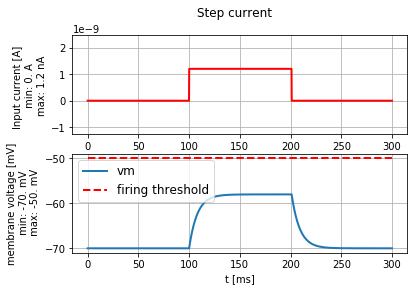